## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model    

In [5]:
"""
Compile 模型
"""
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()
optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 9s 172us/step - loss: 2.2684 - acc: 0.1762 - val_loss: 2.2105 - val_acc: 0.2195
Epoch 2/500
50000/50000 [==============================] - 7s 143us/step - loss: 2.1813 - acc: 0.2261 - val_loss: 2.1509 - val_acc: 0.2407
Epoch 3/500
50000/50000 [==============================] - 7s 143us/step - loss: 2.1296 - acc: 0.2472 - val_loss: 2.1058 - val_acc: 0.2610
Epoch 4/500
50000/50000 [==============================] - 7s 144us/step - loss: 2.0891 - acc: 0.2644 - val_loss: 2.0701 - val_acc: 0.2766
Epoch 5/500
50000/50000 [==============================] - 7s 143us/step - loss: 2.0545 - acc: 0.2787 - val_loss: 2.0379 - val_acc: 0.2912
Epoch 6/500
50000/50000 [==============================] - 7s 144us/step - loss: 2.0244 - acc: 0.2902 - val_loss: 2.0114 - val_acc: 0.2970
Epoch 7/500
50000/50000 [==============================] - 7s 144us/

50000/50000 [==============================] - 7s 143us/step - loss: 1.6578 - acc: 0.4218 - val_loss: 1.6644 - val_acc: 0.4191
Epoch 58/500
50000/50000 [==============================] - 7s 143us/step - loss: 1.6548 - acc: 0.4231 - val_loss: 1.6621 - val_acc: 0.4184
Epoch 59/500
50000/50000 [==============================] - 7s 144us/step - loss: 1.6515 - acc: 0.4249 - val_loss: 1.6617 - val_acc: 0.4163
Epoch 60/500
50000/50000 [==============================] - 7s 145us/step - loss: 1.6488 - acc: 0.4252 - val_loss: 1.6601 - val_acc: 0.4231
Epoch 61/500
50000/50000 [==============================] - 7s 143us/step - loss: 1.6457 - acc: 0.4259 - val_loss: 1.6540 - val_acc: 0.4251
Epoch 62/500
50000/50000 [==============================] - 7s 144us/step - loss: 1.6428 - acc: 0.4281 - val_loss: 1.6514 - val_acc: 0.4250
Epoch 63/500
50000/50000 [==============================] - 7s 145us/step - loss: 1.6400 - acc: 0.4295 - val_loss: 1.6493 - val_acc: 0.4269
Epoch 64/500
50000/50000 [=======

50000/50000 [==============================] - 7s 143us/step - loss: 1.5216 - acc: 0.4695 - val_loss: 1.5464 - val_acc: 0.4547
Epoch 116/500
50000/50000 [==============================] - 7s 144us/step - loss: 1.5196 - acc: 0.4700 - val_loss: 1.5441 - val_acc: 0.4583
Epoch 117/500
50000/50000 [==============================] - 7s 143us/step - loss: 1.5177 - acc: 0.4709 - val_loss: 1.5430 - val_acc: 0.4551
Epoch 118/500
50000/50000 [==============================] - 7s 143us/step - loss: 1.5160 - acc: 0.4718 - val_loss: 1.5438 - val_acc: 0.4534
Epoch 119/500
50000/50000 [==============================] - 7s 144us/step - loss: 1.5143 - acc: 0.4712 - val_loss: 1.5407 - val_acc: 0.4576
Epoch 120/500
50000/50000 [==============================] - 7s 143us/step - loss: 1.5122 - acc: 0.4730 - val_loss: 1.5459 - val_acc: 0.4591
Epoch 121/500
50000/50000 [==============================] - 7s 143us/step - loss: 1.5107 - acc: 0.4741 - val_loss: 1.5411 - val_acc: 0.4559
Epoch 122/500
50000/50000 [

50000/50000 [==============================] - 7s 148us/step - loss: 1.4278 - acc: 0.5024 - val_loss: 1.4782 - val_acc: 0.4797
Epoch 174/500
50000/50000 [==============================] - 8s 155us/step - loss: 1.4261 - acc: 0.5035 - val_loss: 1.4808 - val_acc: 0.4751
Epoch 175/500
50000/50000 [==============================] - 7s 143us/step - loss: 1.4248 - acc: 0.5033 - val_loss: 1.4765 - val_acc: 0.4818
Epoch 176/500
50000/50000 [==============================] - 7s 143us/step - loss: 1.4229 - acc: 0.5031 - val_loss: 1.4801 - val_acc: 0.4721
Epoch 177/500
50000/50000 [==============================] - 7s 145us/step - loss: 1.4215 - acc: 0.5044 - val_loss: 1.4734 - val_acc: 0.4817
Epoch 178/500
50000/50000 [==============================] - 7s 143us/step - loss: 1.4199 - acc: 0.5053 - val_loss: 1.4722 - val_acc: 0.4795
Epoch 179/500
50000/50000 [==============================] - 7s 143us/step - loss: 1.4191 - acc: 0.5042 - val_loss: 1.4731 - val_acc: 0.4805
Epoch 180/500
50000/50000 [

50000/50000 [==============================] - 7s 143us/step - loss: 1.3476 - acc: 0.5295 - val_loss: 1.4295 - val_acc: 0.4939
Epoch 232/500
50000/50000 [==============================] - 7s 148us/step - loss: 1.3465 - acc: 0.5289 - val_loss: 1.4370 - val_acc: 0.4913
Epoch 233/500
50000/50000 [==============================] - 8s 153us/step - loss: 1.3454 - acc: 0.5289 - val_loss: 1.4319 - val_acc: 0.4892
Epoch 234/500
50000/50000 [==============================] - 7s 144us/step - loss: 1.3441 - acc: 0.5299 - val_loss: 1.4279 - val_acc: 0.4913
Epoch 235/500
50000/50000 [==============================] - 7s 143us/step - loss: 1.3425 - acc: 0.5313 - val_loss: 1.4277 - val_acc: 0.4910
Epoch 236/500
50000/50000 [==============================] - 7s 143us/step - loss: 1.3417 - acc: 0.5310 - val_loss: 1.4243 - val_acc: 0.4941
Epoch 237/500
50000/50000 [==============================] - 7s 143us/step - loss: 1.3407 - acc: 0.5312 - val_loss: 1.4247 - val_acc: 0.4971
Epoch 238/500
50000/50000 [

50000/50000 [==============================] - 7s 143us/step - loss: 1.2780 - acc: 0.5525 - val_loss: 1.3977 - val_acc: 0.5044
Epoch 290/500
50000/50000 [==============================] - 7s 143us/step - loss: 1.2768 - acc: 0.5517 - val_loss: 1.4079 - val_acc: 0.5016
Epoch 291/500
50000/50000 [==============================] - 7s 143us/step - loss: 1.2751 - acc: 0.5525 - val_loss: 1.4072 - val_acc: 0.4977
Epoch 292/500
50000/50000 [==============================] - 7s 144us/step - loss: 1.2748 - acc: 0.5524 - val_loss: 1.4105 - val_acc: 0.5033
Epoch 293/500
50000/50000 [==============================] - 7s 144us/step - loss: 1.2728 - acc: 0.5543 - val_loss: 1.3910 - val_acc: 0.5073
Epoch 294/500
50000/50000 [==============================] - 7s 143us/step - loss: 1.2722 - acc: 0.5536 - val_loss: 1.4004 - val_acc: 0.4979
Epoch 295/500
50000/50000 [==============================] - 7s 143us/step - loss: 1.2711 - acc: 0.5539 - val_loss: 1.4013 - val_acc: 0.5019
Epoch 296/500
50000/50000 [

50000/50000 [==============================] - 7s 143us/step - loss: 1.2143 - acc: 0.5741 - val_loss: 1.3667 - val_acc: 0.5160
Epoch 348/500
50000/50000 [==============================] - 7s 143us/step - loss: 1.2139 - acc: 0.5735 - val_loss: 1.3625 - val_acc: 0.5194
Epoch 349/500
50000/50000 [==============================] - 7s 143us/step - loss: 1.2130 - acc: 0.5739 - val_loss: 1.3777 - val_acc: 0.5092
Epoch 350/500
50000/50000 [==============================] - 7s 143us/step - loss: 1.2118 - acc: 0.5754 - val_loss: 1.3647 - val_acc: 0.5180
Epoch 351/500
50000/50000 [==============================] - 7s 143us/step - loss: 1.2107 - acc: 0.5732 - val_loss: 1.3653 - val_acc: 0.5190
Epoch 352/500
50000/50000 [==============================] - 7s 143us/step - loss: 1.2100 - acc: 0.5754 - val_loss: 1.3663 - val_acc: 0.5170
Epoch 353/500
50000/50000 [==============================] - 7s 143us/step - loss: 1.2088 - acc: 0.5758 - val_loss: 1.3819 - val_acc: 0.5103
Epoch 354/500
50000/50000 [

50000/50000 [==============================] - 7s 143us/step - loss: 1.1546 - acc: 0.5949 - val_loss: 1.3646 - val_acc: 0.5185
Epoch 406/500
50000/50000 [==============================] - 7s 143us/step - loss: 1.1533 - acc: 0.5982 - val_loss: 1.3717 - val_acc: 0.5210
Epoch 407/500
50000/50000 [==============================] - 7s 143us/step - loss: 1.1544 - acc: 0.5957 - val_loss: 1.3594 - val_acc: 0.5213
Epoch 408/500
50000/50000 [==============================] - 7s 143us/step - loss: 1.1518 - acc: 0.5976 - val_loss: 1.3480 - val_acc: 0.5239
Epoch 409/500
50000/50000 [==============================] - 7s 143us/step - loss: 1.1509 - acc: 0.5974 - val_loss: 1.3767 - val_acc: 0.5150
Epoch 410/500
50000/50000 [==============================] - 7s 144us/step - loss: 1.1496 - acc: 0.5982 - val_loss: 1.3742 - val_acc: 0.5178
Epoch 411/500
50000/50000 [==============================] - 7s 144us/step - loss: 1.1497 - acc: 0.5976 - val_loss: 1.3688 - val_acc: 0.5162
Epoch 412/500
50000/50000 [

50000/50000 [==============================] - 7s 149us/step - loss: 1.1003 - acc: 0.6150 - val_loss: 1.3398 - val_acc: 0.5275
Epoch 464/500
50000/50000 [==============================] - 7s 143us/step - loss: 1.0977 - acc: 0.6171 - val_loss: 1.3452 - val_acc: 0.5262
Epoch 465/500
50000/50000 [==============================] - 7s 143us/step - loss: 1.0972 - acc: 0.6165 - val_loss: 1.3490 - val_acc: 0.5266
Epoch 466/500
50000/50000 [==============================] - 7s 143us/step - loss: 1.0955 - acc: 0.6176 - val_loss: 1.3565 - val_acc: 0.5237
Epoch 467/500
50000/50000 [==============================] - 7s 143us/step - loss: 1.0951 - acc: 0.6167 - val_loss: 1.3627 - val_acc: 0.5181
Epoch 468/500
50000/50000 [==============================] - 7s 143us/step - loss: 1.0929 - acc: 0.6176 - val_loss: 1.3818 - val_acc: 0.5134
Epoch 469/500
50000/50000 [==============================] - 7s 143us/step - loss: 1.0927 - acc: 0.6172 - val_loss: 1.3381 - val_acc: 0.5277
Epoch 470/500
50000/50000 [

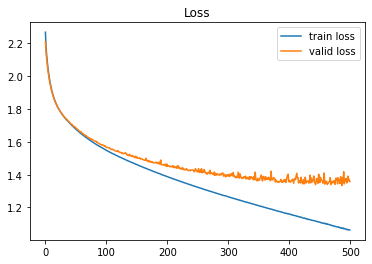

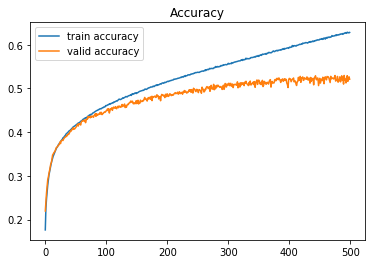

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()